Coverage of reads on putative prophage loci changes during treatment which potentially originates from DNA in phage particles.

Requires:
- Panel A
    - pipeline_data/bw/coverage_from_pipeline_270721/1681d63_S60.lofreq.bam.bw
    - data: OligoMMR2::oligomm_ab_phages_phaster_incomplete
- Panel B
    - pipeline_data/bw/coverage_from_pipeline_270721/1699d00_S33.lofreq.bam.bw
    - pipeline_data/bw/coverage_from_pipeline_270721/1699d04_S34.lofreq.bam.bw
    - pipeline_data/bw/coverage_from_pipeline_270721/1699d09_S35.lofreq.bam.bw
    - pipeline_data/bw/coverage_from_pipeline_270721/1699d14_S36.lofreq.bam.bw
    - pipeline_data/bw/coverage_from_pipeline_270721/1699d18_S37.lofreq.bam.bw
- Panel C
    - Samples Bacteroides caecimuris of mice 1681, 1683, 1684, 1686, 1688, 1690, 1692, 1693, 1694, 1697, 1698, 1699

## Dataset preperation

In [5]:
#setwd("../../")
#setwd("OMM/OMM-AB-Manuscript/")

ERROR: Error in setwd("OMM/OMM-AB-Manuscript/"): cannot change working directory


Settings

In [1]:
smoothing <- 100L
smoothing_panelB <- 50L

In [2]:
library(zoo)
library(rtracklayer)
library(ggplot2)
library(OligoMMR2)


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading 

Load in the coverage information of 1681d63_S60, and subset for Bacteroides_caecimuris_I48

In [3]:
#bw_file <- file.path("pipeline_data/bw/coverage_from_pipeline_270721/1681d63_S60.lofreq.bam.b")
bw_file <- file.path("../../pipeline_data/bw/coverage_from_pipeline_270721/1681d63_S60.lofreq.bam.bw")


bw <- import(bw_file, format = "bw", as = "NumericList")
elem <- bw[["Bacteroides_caecimuris_I48"]]

In [4]:
b <- elem[seq(1, length(elem), 50)]
df <- data.frame(chr = "Bacteroides_caecimuris_I48",
                      start = 1:length(b) * 50L - 50L + 1,
                      end =  1:length(b) * 50L,
                      width = 50,
                      mouse.id = substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4),
                      mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4)),
                      day = as.integer(substr(basename(bw_file), 6, 7)),
                      phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(bw_file), 6, 7))))),
                      phase_num = binDaysByPhaseGroup(as.integer(substr(basename(bw_file), 6, 7))),
                      cov = b)
dim(df)
head(df)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:BiocGenerics’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 96013    10

,chr,start,end,width,mouse.id,mouse.group,day,phase,phase_num,cov
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
1,Bacteroides_caecimuris_I48,1,50,50,1681,Control,63,short-recovery,6,266
2,Bacteroides_caecimuris_I48,51,100,50,1681,Control,63,short-recovery,6,322
3,Bacteroides_caecimuris_I48,101,150,50,1681,Control,63,short-recovery,6,333
4,Bacteroides_caecimuris_I48,151,200,50,1681,Control,63,short-recovery,6,352
5,Bacteroides_caecimuris_I48,201,250,50,1681,Control,63,short-recovery,6,336
6,Bacteroides_caecimuris_I48,251,300,50,1681,Control,63,short-recovery,6,327


In [5]:
data(oligomm_ab_phages_phaster_incomplete)
oligomm_ab_phages_phaster_incomplete <- oligomm_ab_phages_phaster_incomplete[which(oligomm_ab_phages_phaster_incomplete$chr == "Bacteroides_caecimuris_I48"),]
oligomm_ab_phages_phaster_incomplete$pos <- oligomm_ab_phages_phaster_incomplete$start + oligomm_ab_phages_phaster_incomplete$end - oligomm_ab_phages_phaster_incomplete$start

In [6]:
cov_reduced <- data.frame(start_pos = zoo::rollapply(df$start,
                                            width = smoothing, 
                                            by = smoothing,
                                            FUN = min, align = "left"),
                          end_pos = zoo::rollapply(df$end,
                                         width = smoothing,
                                         by = smoothing, 
                                         FUN = max, align = "left"),
                          cov = zoo::rollapply(df$cov, 
                                          width = smoothing, 
                                          by = smoothing, 
                                          FUN = median, align = "left"))
head(cov_reduced)

,start_pos,end_pos,cov
,<dbl>,<int>,<dbl>
1,1,5000,329.5
2,5001,10000,339.5
3,10001,15000,340.0
4,15001,20000,320.5
5,20001,25000,353.0
6,25001,30000,348.0


## Panel A

Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


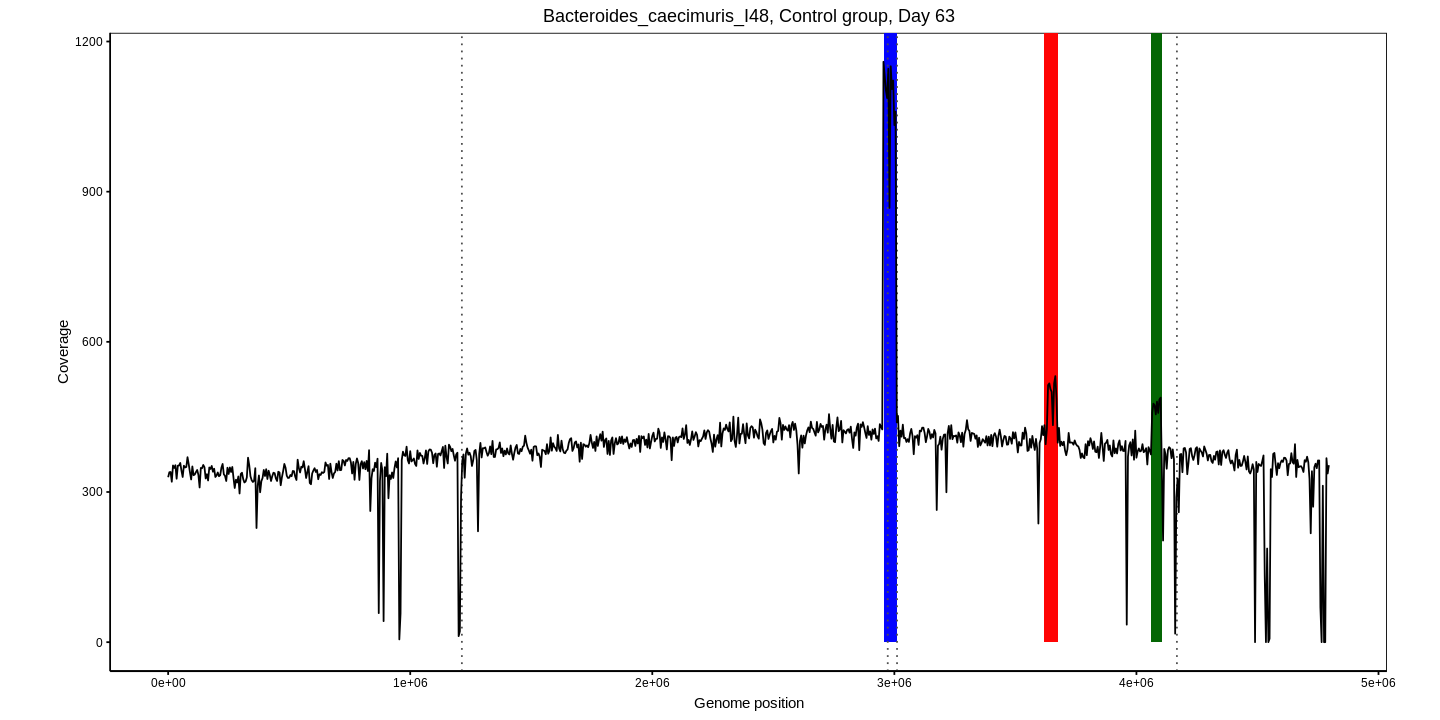

In [29]:
options(repr.plot.width = 12, repr.plot.height = 6)

p <- ggplot(cov_reduced, aes(x = start_pos,  y = cov))

p <- p + geom_rect(xmin = 2957999, xmax = 3010600, ymin = 0, ymax = Inf, fill = "blue", alpha = .1)
p <- p + geom_rect(xmin = 3620000, xmax = 3678000, ymin = 0, ymax = Inf, fill = "red", alpha = .1)
p <- p + geom_rect(xmin = 4060000, xmax = 4105000, ymin = 0, ymax = Inf, fill = "darkgreen", alpha = .1)

p <- p + geom_vline(data = oligomm_ab_phages_phaster_incomplete, aes(xintercept = pos), color  = "grey30", linetype = 3)
p <- p + geom_line(size = .5)
p <- p + theme_pmuench(base_size = 9)
p <- p + ggtitle("Bacteroides_caecimuris_I48, Control group, Day 63")
p <- p + theme(aspect.ratio = .5, strip.background = element_blank(), strip.placement = "outside")
p <- p + xlab("Genome position") + ylab("Coverage")
p <- p + theme(panel.background = element_rect(fill = "white", colour = 'black'))
p

In [30]:
pdf("Figure4_panela.pdf", width = 3.5, height = 2.5)
print(p)
dev.off()

png 
  2

## Panel B

In [96]:
region_start <- 2850000
region_end <- 3100000
phage_start <- 2957999
phage_end <- 3010600

samples <- c("../../pipeline_data/bw/coverage_from_pipeline_270721/1699d00_S33.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d04_S34.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d09_S35.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d14_S36.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d18_S37.lofreq.bam.bw",
            "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d23_S38.lofreq.bam.bw"

)
           
chr <- "Bacteroides_caecimuris_I48"

sample_list <- list()
for (sample in samples){
  message(sample)
  bw_file <- file.path(sample)
  bw <- import(bw_file, format = "bw", as = "NumericList")
  elem <- bw[[chr]]
  b <- elem[seq(1, length(elem), 50)]
  day <- paste0("day ", as.integer(substr(basename(bw_file), 6, 7)))
  df <- data.frame(chr = chr,
                        start = 1:length(b) * 50L - 50L + 1,
                        end =  1:length(b) * 50L,
                        width = 50,
                        mouse.id = substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4),
                        mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4)),
                        day = day,
                        phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(bw_file), 6, 7))))),
                        phase_num = binDaysByPhaseGroup(as.integer(substr(basename(bw_file), 6, 7))),
                        cov = b)
  
  df_subset <-  df[which(df$start > region_start &
                           df$start < region_end), ]
  df_subset$cov_smoothed <- zoo::rollmean(df_subset$cov, smoothing, na.pad = TRUE)
  sample_list[[day]] <- df_subset
}

df_collection <- do.call("rbind", sample_list)
head(df_collection)

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d00_S33.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d04_S34.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d09_S35.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d14_S36.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d18_S37.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d23_S38.lofreq.bam.bw



,chr,start,end,width,mouse.id,mouse.group,day,phase,phase_num,cov,cov_smoothed
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
day 0.57001,Bacteroides_caecimuris_I48,2850001,2850050,50,1699,Vancomycin,day 0,pre-treatment,1,1116,NA
day 0.57002,Bacteroides_caecimuris_I48,2850051,2850100,50,1699,Vancomycin,day 0,pre-treatment,1,1150,NA
day 0.57003,Bacteroides_caecimuris_I48,2850101,2850150,50,1699,Vancomycin,day 0,pre-treatment,1,1143,NA
day 0.57004,Bacteroides_caecimuris_I48,2850151,2850200,50,1699,Vancomycin,day 0,pre-treatment,1,1207,NA
day 0.57005,Bacteroides_caecimuris_I48,2850201,2850250,50,1699,Vancomycin,day 0,pre-treatment,1,1174,NA
day 0.57006,Bacteroides_caecimuris_I48,2850251,2850300,50,1699,Vancomycin,day 0,pre-treatment,1,1164,NA


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“Removed 99 row(s) containing missing values (geom_path).”


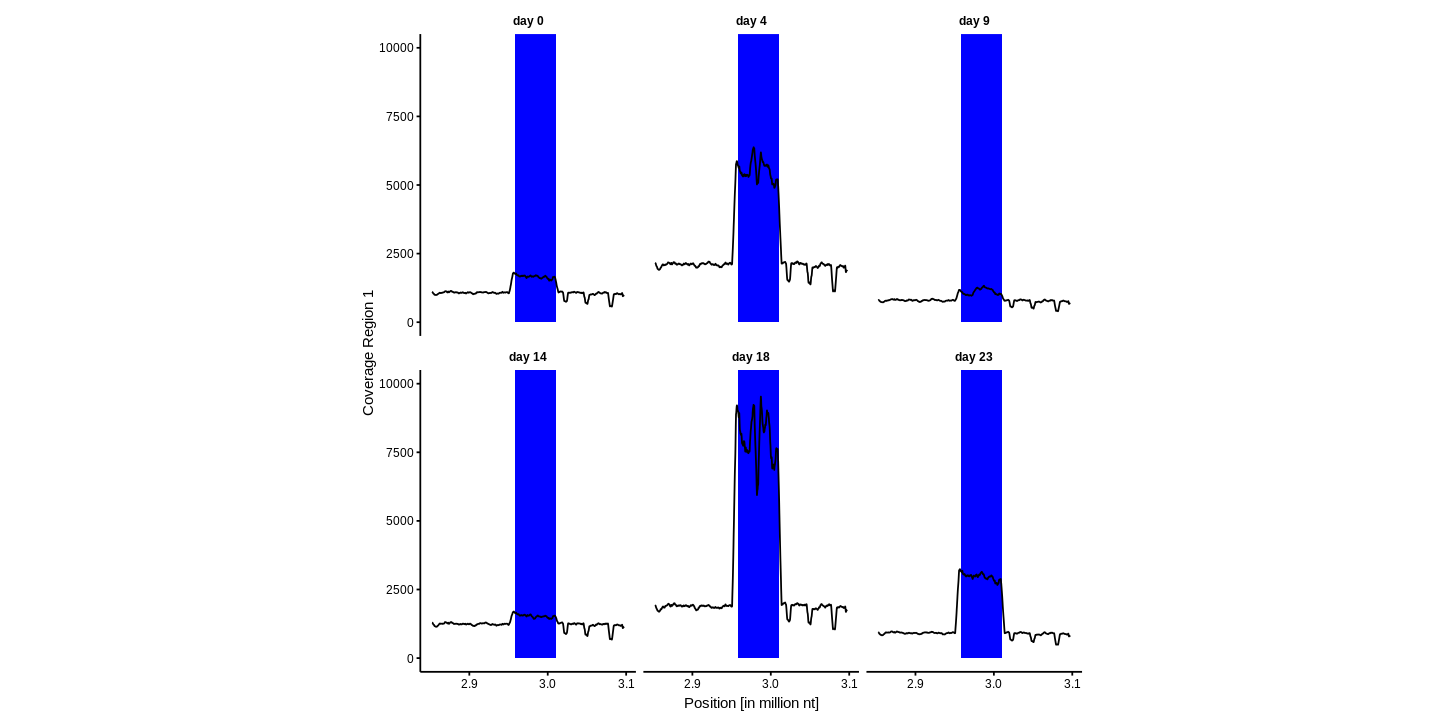

In [105]:
p <- ggplot(transform(df_collection, day = factor(day,levels = c("day 0", 
                                                               "day 4",
                                                               "day 9",
                                                               "day 14",
                                                               "day 18",
                                                                "day 23"))), 
            aes(x = start / 1e6, y = cov_smoothed))
p <- p + geom_rect(xmin = 2957999/1e6, xmax = 3010600/1e6, ymin = 0, ymax = Inf, fill = "blue", alpha = .3)

p <- p + geom_line()
p <- p + facet_wrap( ~ day, ncol = 3, nrow = 2, strip.position = "top")
p <- p + xlab("Position [in million nt]") + ylab("Coverage Region 1")
p <- p + theme(axis.title.x = element_blank(),
               axis.text.x = element_blank(),
               axis.ticks.x = element_blank())
p <- p + scale_x_continuous(breaks = c(2.9, 3.0, 3.1))
p <- p + theme_pmuench(base_size = 9)
p <- p + ylim(0, 10000)
p <- p + theme(aspect.ratio = 1.4)
p

Get ratio values for MS (20220518132309)

In [141]:
head(df_collection)

,chr,start,end,width,mouse.id,mouse.group,day,phase,phase_num,cov,cov_smoothed
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
day 0.57001,Bacteroides_caecimuris_I48,2850001,2850050,50,1699,Vancomycin,day 0,pre-treatment,1,1116,NA
day 0.57002,Bacteroides_caecimuris_I48,2850051,2850100,50,1699,Vancomycin,day 0,pre-treatment,1,1150,NA
day 0.57003,Bacteroides_caecimuris_I48,2850101,2850150,50,1699,Vancomycin,day 0,pre-treatment,1,1143,NA
day 0.57004,Bacteroides_caecimuris_I48,2850151,2850200,50,1699,Vancomycin,day 0,pre-treatment,1,1207,NA
day 0.57005,Bacteroides_caecimuris_I48,2850201,2850250,50,1699,Vancomycin,day 0,pre-treatment,1,1174,NA
day 0.57006,Bacteroides_caecimuris_I48,2850251,2850300,50,1699,Vancomycin,day 0,pre-treatment,1,1164,NA


In [145]:
phage_start <- 2957999
phage_end <- 3010600

df_collection_inside <- df_collection[which(df_collection$start >= phage_start &
                                                 df_collection$end <= phage_end),]


df_collection_outside <- df_collection[which(df_collection$start < phage_start |
                                                 df_collection$end > phage_end),]

df_inside_agg <- aggregate(cov ~ mouse.group + phase,
                               FUN = "median", 
                               data = df_collection_inside)
head(df_inside_agg)

,mouse.group,phase,cov
,<chr>,<chr>,<dbl>
1,Vancomycin,post-treatment,6327.5
2,Vancomycin,pre-treatment,1655.0
3,Vancomycin,short-recovery,1535.5


In [147]:
6327.5/ 1655.0 

[1] 3.823263

In [148]:
phage_start <- 2957999
phage_end <- 3010600

df_collection_inside <- df_collection[which(df_collection$start >= phage_start &
                                                 df_collection$end <= phage_end),]


df_collection_outside <- df_collection[which(df_collection$start < phage_start |
                                                 df_collection$end > phage_end),]

df_inside_agg <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = df_collection_inside)
head(df_inside_agg)

,mouse.group,day,cov
,<chr>,<chr>,<dbl>
1,Vancomycin,day 0,1655.0
2,Vancomycin,day 14,1535.0
3,Vancomycin,day 18,8073.5
4,Vancomycin,day 23,2966.5
5,Vancomycin,day 4,5497.5
6,Vancomycin,day 9,1101.0


In [109]:
pdf("Figure4_panelb.pdf", width = 2.5, height = 2)
print(p)
dev.off()

Warning message:
“Removed 99 row(s) containing missing values (geom_path).”


png 
  2

In [66]:
region_start <- 4060000 - 50000
region_end <- 4105000 + 50000
phage_start <- 4060000
phage_end <- 4105000

samples <- c("../../pipeline_data/bw/coverage_from_pipeline_270721/1699d58_S64.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d63_S65.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d67_S66.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d72_S67.lofreq.bam.bw",
             "../../pipeline_data/bw/coverage_from_pipeline_270721/1699d79_S68.lofreq.bam.bw")
           
chr <- "Bacteroides_caecimuris_I48"

sample_list <- list()
for (sample in samples){
  message(sample)
  bw_file <- file.path(sample)
  bw <- import(bw_file, format = "bw", as = "NumericList")
  elem <- bw[[chr]]
  b <- elem[seq(1, length(elem), 50)]
  day <- paste0("day ", as.integer(substr(basename(bw_file), 6, 7)))
  df <- data.frame(chr = chr,
                        start = 1:length(b) * 50L - 50L + 1,
                        end =  1:length(b) * 50L,
                        width = 50,
                        mouse.id = substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4),
                        mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4)),
                        day = day,
                        phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(bw_file), 6, 7))))),
                        phase_num = binDaysByPhaseGroup(as.integer(substr(basename(bw_file), 6, 7))),
                        cov = b)
  
  df_subset <-  df[which(df$start > region_start &
                           df$start < region_end), ]
  df_subset$cov_smoothed <- zoo::rollmean(df_subset$cov, smoothing, na.pad = TRUE)
  sample_list[[day]] <- df_subset
}

df_collection <- do.call("rbind", sample_list)
head(df_collection)

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d58_S64.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d63_S65.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d67_S66.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d72_S67.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1699d79_S68.lofreq.bam.bw



,chr,start,end,width,mouse.id,mouse.group,day,phase,phase_num,cov,cov_smoothed
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
day 58.80201,Bacteroides_caecimuris_I48,4010001,4010050,50,1699,Vancomycin,day 58,short-recovery,5,787,NA
day 58.80202,Bacteroides_caecimuris_I48,4010051,4010100,50,1699,Vancomycin,day 58,short-recovery,5,806,NA
day 58.80203,Bacteroides_caecimuris_I48,4010101,4010150,50,1699,Vancomycin,day 58,short-recovery,5,765,NA
day 58.80204,Bacteroides_caecimuris_I48,4010151,4010200,50,1699,Vancomycin,day 58,short-recovery,5,787,NA
day 58.80205,Bacteroides_caecimuris_I48,4010201,4010250,50,1699,Vancomycin,day 58,short-recovery,5,833,NA
day 58.80206,Bacteroides_caecimuris_I48,4010251,4010300,50,1699,Vancomycin,day 58,short-recovery,5,874,NA


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”
Warning message:
“Removed 99 row(s) containing missing values (geom_path).”


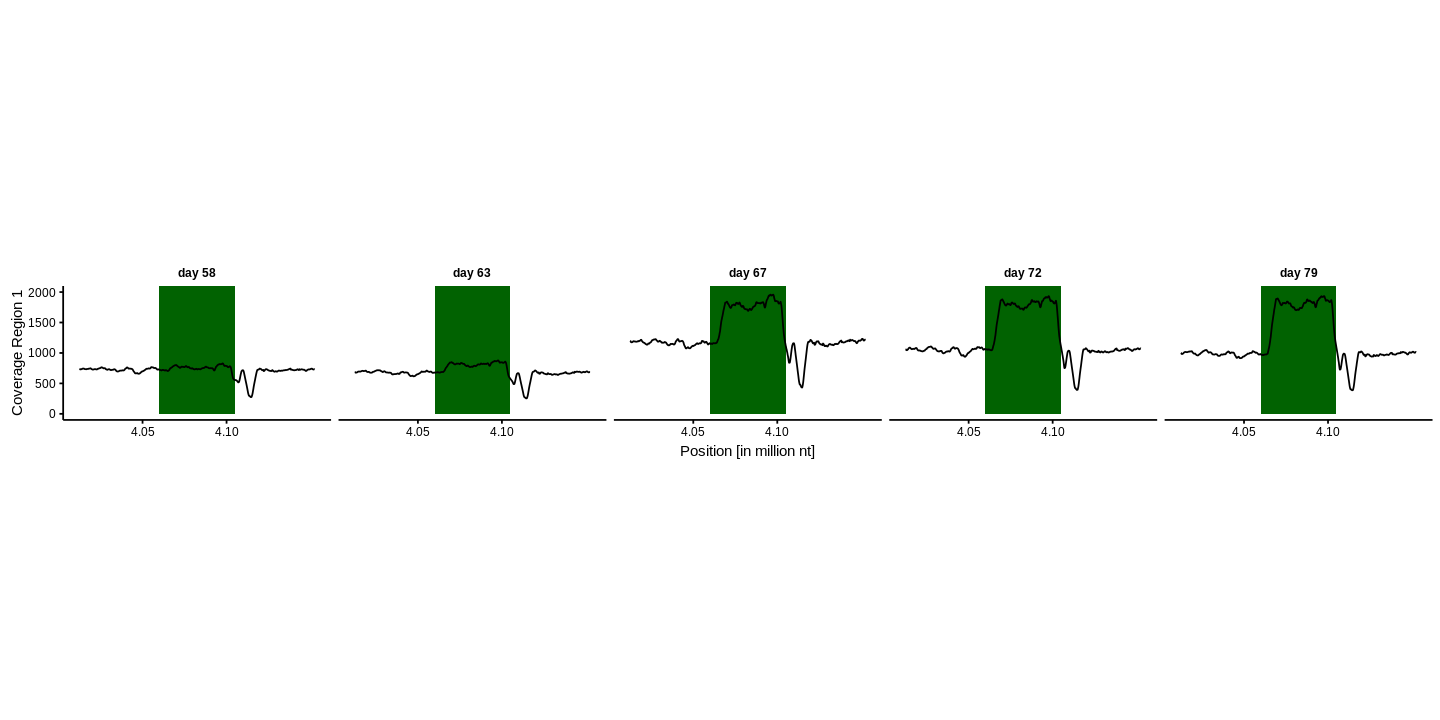

In [73]:


p <- ggplot(transform(df_collection, day = factor(day,levels = c("day 58", 
                                                               "day 63",
                                                               "day 67",
                                                               "day 72",
                                                               "day 79"))), 
            aes(x = start / 1e6, y = cov_smoothed))
p <- p + geom_rect(xmin = 4060000/1e6, xmax = 4105000/1e6, ymin = 0, ymax = Inf, fill = "darkgreen", alpha = .3)

p <- p + geom_line()
p <- p + facet_wrap( ~ day, ncol = 5, nrow = 1, strip.position = "top")
p <- p + xlab("Position [in million nt]") + ylab("Coverage Region 1")
p <- p + theme(axis.title.x = element_blank(),
               axis.text.x = element_blank(),
               axis.ticks.x = element_blank())
p <- p + scale_x_continuous(breaks = c(4.05, 4.1))
p <- p + theme_pmuench(base_size = 9)
p <- p + ylim(0, 2000)
p <- p + theme(aspect.ratio = .5)
p

In [71]:
pdf("Figure4_panelb2.pdf", width = 4.5, height = 2.0)
print(p)
dev.off()

Warning message:
“Removed 99 row(s) containing missing values (geom_path).”


png 
  2

## Panel C

Fold changes (FC) in coverage of the loci compared to the coverage adjacent to the loci is shown as filled region, displayed with coverage outside the region (lower line) and coverage of the loci (upper line). While region 1 (red) shows a high fold-change after treatment in the vancomycin group, region 2 (green) shows a higher and time-dependent fold change in the tetracycline group.

First we create a dataframe that processes all coverage file, extracts Bacteroides_caecimuris_I48 on the three positions

pipeline_data/bw/coverage_from_pipeline_270721/1681d00_S56.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1681d14_S57.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1681d30_S58.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1681d49_S59.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1681d63_S60.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1681d79_S61.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d00_S47.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d04_S48.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d09_S49.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d14_S50.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d18_S51.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d23_S52.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipeline_270721/1683d30_S53.lofreq.bam.bw

pipeline_data/bw/coverage_from_pipelin

In [79]:
region_1_start <- 2850000
region_1_end <- 3100000
phage_1_start <- 2957999
phage_1_end <- 3010600

region_2_start <- 3620000 - 100000
region_2_end <- 3678000 + 100000
phage_2_start <- 3620000
phage_2_end <- 3678000

region_3_start <- 4000000
region_3_end <- 4150000
phage_3_start <- 4060000
phage_3_end <- 4105000

In [80]:
bw_list <- list.files("../../pipeline_data/bw/coverage_from_pipeline_270721", full.names = T)
sample <- bw_list[1]
message(sample)
bw <- import(sample, format = "bw", as = "NumericList")
elem <- bw[["Bacteroides_caecimuris_I48"]]
b <- elem[seq(1, length(elem), 50)]
df <- data.frame(chr = "Bacteroides_caecimuris_I48",
                      start = 1:length(b) * 50L - 50L + 1,
                      end =  1:length(b) * 50L,
                      width = 50,
                      mouse.id = substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4),
                      mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(bw_file)), 1, 4)),
                      day = as.integer(substr(basename(bw_file), 6, 7)),
                      phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(bw_file), 6, 7))))),
                      phase_num = binDaysByPhaseGroup(as.integer(substr(basename(bw_file), 6, 7))),
                      cov = b)

df_subset1 <- df[which(df$start >= region_1_start & df$end < region_1_end),]
df_subset2 <- df[which(df$start >= region_2_start & df$end < region_2_end),]
df_subset3 <- df[which(df$start >= region_3_start & df$end < region_3_end),]

inside_phage1_median <- median(df[which(df$start >= phage_1_start & df$end < phage_1_end),]$cov)
inside_phage2_median <- median(df[which(df$start >= phage_2_start & df$end < phage_2_end),]$cov)
inside_phage3_median <- median(df[which(df$start >= phage_3_start & df$end < phage_3_end),]$cov)

outside_phage1_median <- median(df[which(df$start >= region_1_start & df$end < region_1_end),]$cov)
outside_phage2_median <- median(df[which(df$start >= region_2_start & df$end < region_2_end),]$cov)
outside_phage3_median <- median(df[which(df$start >= region_3_start & df$end < region_3_end),]$cov)

outside_phage_1_data_before <- df[which(df$start >= region_1_start & df$end < phage_1_start),]
outside_phage_1_data_after <- df[which(df$end <= region_1_end & df$end > phage_1_end),]

dim(df_subset1)
dim(outside_phage_1_data_before)
dim(outside_phage_1_data_after)

head(outside_phage_1_data_before)
max(outside_phage_1_data_before$end)

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d00_S56.lofreq.bam.bw



[1] 4999   10

[1] 2159   10

[1] 1788   10

,chr,start,end,width,mouse.id,mouse.group,day,phase,phase_num,cov
,<chr>,<dbl>,<int>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>
57001,Bacteroides_caecimuris_I48,2850001,2850050,50,1699,Vancomycin,18,post-treatment,2,655
57002,Bacteroides_caecimuris_I48,2850051,2850100,50,1699,Vancomycin,18,post-treatment,2,647
57003,Bacteroides_caecimuris_I48,2850101,2850150,50,1699,Vancomycin,18,post-treatment,2,603
57004,Bacteroides_caecimuris_I48,2850151,2850200,50,1699,Vancomycin,18,post-treatment,2,592
57005,Bacteroides_caecimuris_I48,2850201,2850250,50,1699,Vancomycin,18,post-treatment,2,548
57006,Bacteroides_caecimuris_I48,2850251,2850300,50,1699,Vancomycin,18,post-treatment,2,575


[1] 2957950

In [81]:
bw_list <- list.files("../../pipeline_data/bw/coverage_from_pipeline_270721", full.names = T)

# the region with diff. cov plus a few nt before/after
region_1_data <- list()
region_2_data <- list()
region_3_data <- list()

# only the region with diff. cov
phage_1_data <- list()
phage_2_data <- list()
phage_3_data <- list()

# the region right before/after the diff. cov
outside_phage_1_data_before <- list()
outside_phage_1_data_after <- list()
outside_phage_2_data_before <- list()
outside_phage_2_data_after <- list()
outside_phage_3_data_after <- list()
outside_phage_3_data_before <- list()

for (sample in bw_list){
    message(sample)
    bw <- import(sample, format = "bw", as = "NumericList")
    elem <- bw[["Bacteroides_caecimuris_I48"]]
    b <- elem[seq(1, length(elem), 50)]
    df <- data.frame(chr = "Bacteroides_caecimuris_I48",
                          start = 1:length(b) * 50L - 50L + 1,
                          end =  1:length(b) * 50L,
                          width = 50,
                          mouse.id = substr(tools::file_path_sans_ext(basename(sample)), 1, 4),
                          mouse.group = translateMouseIdToTreatmentGroup(substr(tools::file_path_sans_ext(basename(sample)), 1, 4)),
                          day = as.integer(substr(basename(sample), 6, 7)),
                          phase = binDaysByPhase(as.numeric(as.matrix(as.integer(substr(basename(sample), 6, 7))))),
                          phase_num = binDaysByPhaseGroup(as.integer(substr(basename(sample), 6, 7))),
                          cov = b)

    region_1_data[[sample]] <- df[which(df$start >= region_1_start & df$end < region_1_end),]
    region_2_data[[sample]] <- df[which(df$start >= region_2_start & df$end < region_2_end),]
    region_3_data[[sample]] <- df[which(df$start >= region_3_start & df$end < region_3_end),]
    
    phage_1_data[[sample]] <- df[which(df$start >= phage_1_start & df$end < phage_1_end),]
    phage_2_data[[sample]] <- df[which(df$start >= phage_2_start & df$end < phage_2_end),]
    phage_3_data[[sample]] <- df[which(df$start >= phage_3_start & df$end < phage_3_end),]

    outside_phage_1_data_before[[sample]] <- df[which(df$start >= region_1_start & df$end < phage_1_start),]
    outside_phage_1_data_after[[sample]] <- df[which(df$end <= region_1_end & df$end > phage_1_end),]
    
    outside_phage_2_data_before[[sample]] <- df[which(df$start >= region_2_start & df$end < phage_2_start),]
    outside_phage_2_data_after[[sample]] <- df[which(df$end <= region_2_end & df$end > phage_2_end),]
    
    outside_phage_3_data_before[[sample]] <- df[which(df$start >= region_3_start & df$end < phage_3_start),]
    outside_phage_3_data_after[[sample]] <- df[which(df$end <= region_3_end & df$end > phage_3_end),]
}

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d00_S56.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d14_S57.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d30_S58.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d49_S59.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d63_S60.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1681d79_S61.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1683d00_S47.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1683d04_S48.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1683d09_S49.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1683d14_S50.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1683d18_S51.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pipeline_270721/1683d23_S52.lofreq.bam.bw

../../pipeline_data/bw/coverage_from_pip

In [82]:
reg1_df <- do.call("rbind", region_1_data)
reg2_df <- do.call("rbind", region_2_data)
reg3_df <- do.call("rbind", region_3_data)

phage1_df <- do.call("rbind", phage_1_data)
phage2_df <- do.call("rbind", phage_2_data)
phage3_df <- do.call("rbind", phage_3_data)

In [83]:
# real outside
outside_phage_1_data_before_df <- do.call("rbind", outside_phage_1_data_before)
outside_phage_1_data_after_df <- do.call("rbind", outside_phage_1_data_after)

outside_phage_2_data_before_df <- do.call("rbind", outside_phage_2_data_before)
outside_phage_2_data_after_df <- do.call("rbind", outside_phage_2_data_after)

outside_phage_3_data_before_df <- do.call("rbind", outside_phage_3_data_before)
outside_phage_3_data_after_df <- do.call("rbind", outside_phage_3_data_after)

outside_phage_1_data <- rbind(outside_phage_1_data_before_df,  outside_phage_1_data_after_df)
outside_phage_2_data <- rbind(outside_phage_2_data_before_df,  outside_phage_2_data_after_df)
outside_phage_3_data <- rbind(outside_phage_3_data_before_df,  outside_phage_3_data_after_df)

In [84]:
cov_outside_reg1 <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = outside_phage_1_data)
cov_outside_reg1$type <- "outside"
cov_outside_reg1$region <- "region_1"

cov_outside_reg2 <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = outside_phage_2_data)
cov_outside_reg2$type <- "outside"
cov_outside_reg2$region <- "region_2"


cov_outside_reg3 <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = outside_phage_3_data)
cov_outside_reg3$type <- "outside"
cov_outside_reg3$region <- "region_3"

all_regions <- rbind(cov_outside_reg1, cov_outside_reg2, cov_outside_reg3)

In [85]:
cov_inside_reg1 <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = phage1_df)
cov_inside_reg1$type <- "inside"
cov_inside_reg1$region <- "region_1"


cov_inside_reg2 <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = phage2_df)
cov_inside_reg2$type <- "inside"
cov_inside_reg2$region <- "region_2"


cov_inside_reg3 <- aggregate(cov ~ mouse.group + day,
                               FUN = "median", 
                               data = phage3_df)
cov_inside_reg3$type <- "inside"
cov_inside_reg3$region <- "region_3"

all_regions_in <- rbind(cov_inside_reg1, cov_inside_reg2, cov_inside_reg3)

In [86]:
head(cov_outside_reg1)
head(cov_inside_reg1)

,mouse.group,day,cov,type,region
,<chr>,<int>,<dbl>,<chr>,<chr>
1,Ciprofloxacin,0,827,outside,region_1
2,Control,0,626,outside,region_1
3,Tetracyclin,0,1087,outside,region_1
4,Vancomycin,0,883,outside,region_1
5,Ciprofloxacin,4,1069,outside,region_1
6,Control,4,876,outside,region_1


,mouse.group,day,cov,type,region
,<chr>,<int>,<dbl>,<chr>,<chr>
1,Ciprofloxacin,0,891,inside,region_1
2,Control,0,871,inside,region_1
3,Tetracyclin,0,1182,inside,region_1
4,Vancomycin,0,1528,inside,region_1
5,Ciprofloxacin,4,1136,inside,region_1
6,Control,4,921,inside,region_1


In [87]:
df_all <- rbind(all_regions_in, all_regions)
df_merged <- merge(all_regions_in, all_regions, by=c("day", "mouse.group", "region"))
head(df_merged)

,day,mouse.group,region,cov.x,type.x,cov.y,type.y
,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>
1,0,Ciprofloxacin,region_1,891,inside,827,outside
2,0,Ciprofloxacin,region_2,767,inside,770,outside
3,0,Ciprofloxacin,region_3,829,inside,723,outside
4,0,Control,region_1,871,inside,626,outside
5,0,Control,region_2,628,inside,581,outside
6,0,Control,region_3,632,inside,548,outside


Warning message:
“`panel.margin` is deprecated. Please use `panel.spacing` property instead”
Warning message:
“`legend.margin` must be specified using `margin()`. For the old behavior use legend.spacing”


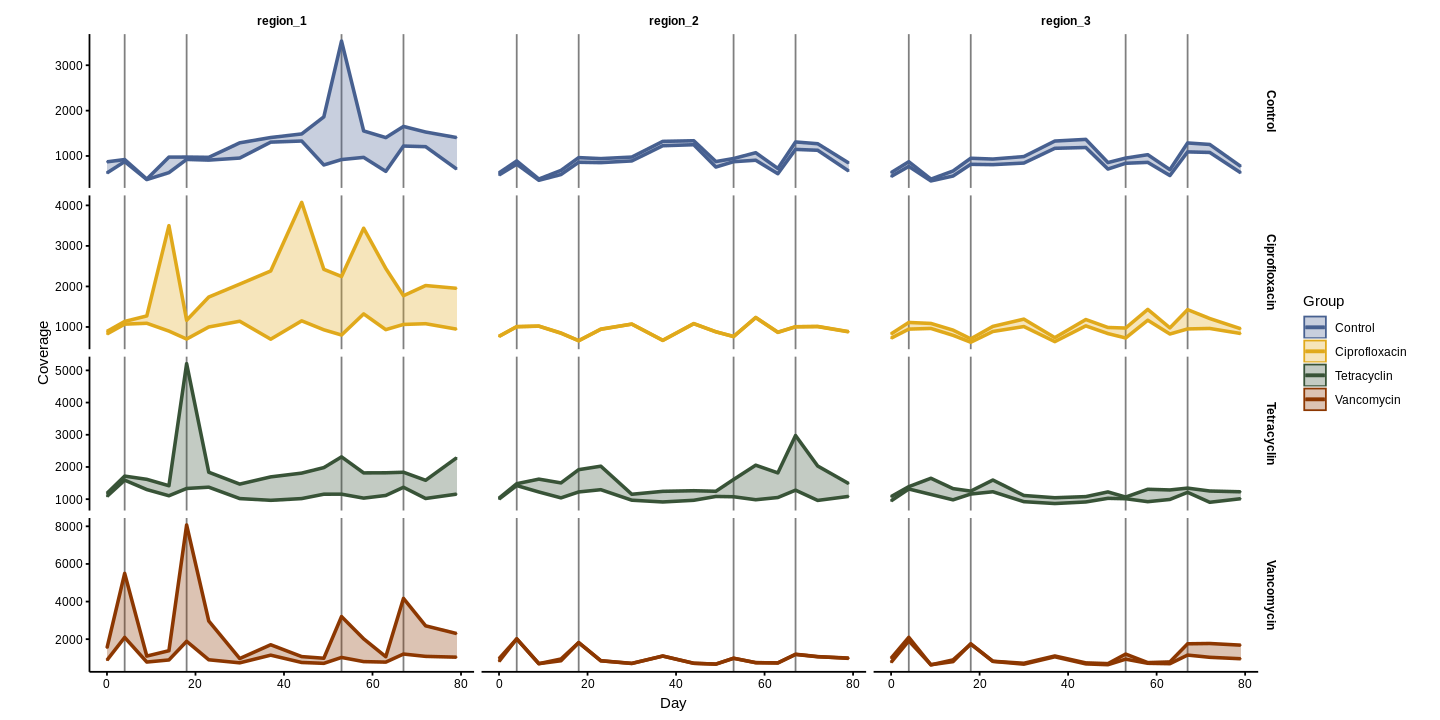

In [121]:
df_merged$mouse.group <- factor(df_merged$mouse.group, levels = c("Control",
                                                               "Ciprofloxacin",
                                                                  "Tetracyclin",
                                                               "Vancomycin"))
p <- ggplot(df_merged, aes(x = day,
                           y = cov.y,
                           ymin = cov.y,
                           ymax = cov.x,
                           group = mouse.group,
                             color = mouse.group))
#p <- p + geom_rect(xmin = 0, xmax = 4,ymin = -Inf, ymax = Inf, color = "grey95", fill = "grey95", alpha = .1)
#p <- p + geom_rect(xmin = 14, xmax = 18,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
#p <- p + geom_rect(xmin = 49, xmax = 53,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)
#p <- p + geom_rect(xmin = 64, xmax = 68,ymin = -Inf, ymax = Inf,  color = "grey95", fill = "grey95", alpha = .1)


p <- p + geom_vline(xintercept = 4,
                    color = "grey50",
                    size = .5)
p <- p + geom_vline(xintercept = 18,
                    color = "grey50",
                    size = .5)
p <- p + geom_vline(xintercept = 53,
                    color = "grey50",
                    size = .5)
p <- p + geom_vline(xintercept = 67,
                    color = "grey50",
                    size = .5)

p <- p + geom_ribbon(aes(ymin = cov.y, ymax = cov.x,
                         x = day, fill = mouse.group), alpha = 0.3)
p <- p + xlab("Day") + ylab("Coverage")
p <- p + scale_color_manual(name = "Group", values= c("Control" = "#476090",
                                                      "Ciprofloxacin" = "#E0A91B",
                                                      "Tetracyclin" = "#385337",
                                                      "Vancomycin" = "#8C3701"))
p <- p + scale_fill_manual(name = "Group", values= c("Control" = "#476090",
                                                     "Ciprofloxacin" = "#E0A91B",
                                                     "Tetracyclin" = "#385337",
                                                     "Vancomycin" = "#8C3701"))
p <- p + geom_line(size = 1, linetype = 1)
p <- p + geom_line(aes(y = cov.x), size = 1, linetype = 1)
p <- p + facet_grid(mouse.group ~ region, scales = "free_y")
p <- p + theme_pmuench(base_size = 9)
p <- p + theme(aspect.ratio = .4)

p

In [122]:
pdf("Figure4_panelc.pdf", width = 5.5, height = 5.0)
print(p)
dev.off()

png 
  2